In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')
print("Shape of df :",df.shape)
df.head()

Shape of df : (128975, 24)


/tmp/ipykernel_33/3786092957.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
unique_values_all_columns = df.nunique()
print(unique_values_all_columns)

index                 128975
Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [6]:
df = df[['index', 'Category','Date','ship-state','Amount']]
df.head()

,index,Category,Date,ship-state,Amount
0,0,Set,04-30-22,MAHARASHTRA,647.62
1,1,kurta,04-30-22,KARNATAKA,406.00
2,2,kurta,04-30-22,MAHARASHTRA,329.00
3,3,Western Dress,04-30-22,PUDUCHERRY,753.33
4,4,Top,04-30-22,TAMIL NADU,574.00


In [7]:
df.isna().sum()

index            0
Category         0
Date             0
ship-state      33
Amount        7795
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df['ship-state'] = df['ship-state'].replace('Puducherry', 'GUJARAT')
df['ship-state'] = df['ship-state'].replace('Goa', 'GOA')
df['ship-state'] = df['ship-state'].replace('Delhi', 'DELHI')
df['ship-state'] = df['ship-state'].replace('Punjab', 'PUNJAB')
df['ship-state'] = df['ship-state'].replace('Rajshthan', 'RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('Manipur', 'MANIPUR')
df['ship-state'] = df['ship-state'].replace('rajasthan', 'RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('Odisha', 'ODISHA')
df['ship-state'] = df['ship-state'].replace('NL', 'NAGALAND')
df['ship-state'] = df['ship-state'].replace('Bihar', 'BIHAR')
df['ship-state'] = df['ship-state'].replace('punjab', 'PUNJAB')
df['ship-state'] = df['ship-state'].replace('New Delhi', 'DELHI')
df['ship-state'] = df['ship-state'].replace('Rajasthan', 'RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('Puducherry', 'PUDUCHERRY')
df['ship-state'] = df['ship-state'].replace('delhi', 'DELHI')
df['ship-state'] = df['ship-state'].replace('RJ', 'RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('Chandigarh', 'CHANDIGARH')
df['ship-state'] = df['ship-state'].replace('orissa', 'ODISHA')
df['ship-state'] = df['ship-state'].replace('goa', 'GOA')
df['ship-state'] = df['ship-state'].replace('PB', 'PUNJAB')
df['ship-state'] = df['ship-state'].replace('Arunachal Pradesh', 'ARUNACHAL PRADESH')
df['ship-state'] = df['ship-state'].replace('AR', 'ARUNACHAL PRADESH')
df['ship-state'] = df['ship-state'].replace('Pondicherry', 'PUDUCHERRY')
df['ship-state'] = df['ship-state'].replace('Sikkim', 'SIKKIM')
df['ship-state'] = df['ship-state'].replace('Arunachal pradesh', 'ARUNACHAL PRADESH')
df['ship-state'] = df['ship-state'].replace('Nagaland', 'NAGALAND')
df['ship-state'] = df['ship-state'].replace('bihar', 'BIHAR')
df['ship-state'] = df['ship-state'].replace('Mizoram', 'MIZORAM')
df['ship-state'] = df['ship-state'].replace('rajsthan', 'RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('Orissa', 'ODISHA')
df['ship-state'] = df['ship-state'].replace('Rajsthan', 'RAJASTHAN')
df['ship-state'] = df['ship-state'].replace('Meghalaya', 'MEGHALAYA')

In [10]:
unique_values = df['ship-state'].unique()

# Print unique values
print(unique_values)

['MAHARASHTRA' 'KARNATAKA' 'PUDUCHERRY' 'TAMIL NADU' 'UTTAR PRADESH'
 'CHANDIGARH' 'TELANGANA' 'ANDHRA PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA'
 'ASSAM' 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'KERALA' 'MADHYA PRADESH'
 'WEST BENGAL' 'NAGALAND' 'Gujarat' 'UTTARAKHAND' 'BIHAR'
 'JAMMU & KASHMIR' 'PUNJAB' 'HIMACHAL PRADESH' 'ARUNACHAL PRADESH'
 'MANIPUR' 'GOA' 'MEGHALAYA' 'TRIPURA' 'LADAKH' 'DADRA AND NAGAR' 'SIKKIM'
 'ANDAMAN & NICOBAR ' 'MIZORAM' 'Punjab/Mohali/Zirakpur' 'GUJARAT'
 'LAKSHADWEEP']


In [11]:
df.describe()

,index,Amount
count,121149.000000,121149.000000
mean,64483.736259,648.573305
std,37221.261564,281.222115
min,0.000000,0.000000
25%,32290.000000,449.000000
50%,64474.000000,605.000000
75%,96681.000000,788.000000
max,128974.000000,5584.000000


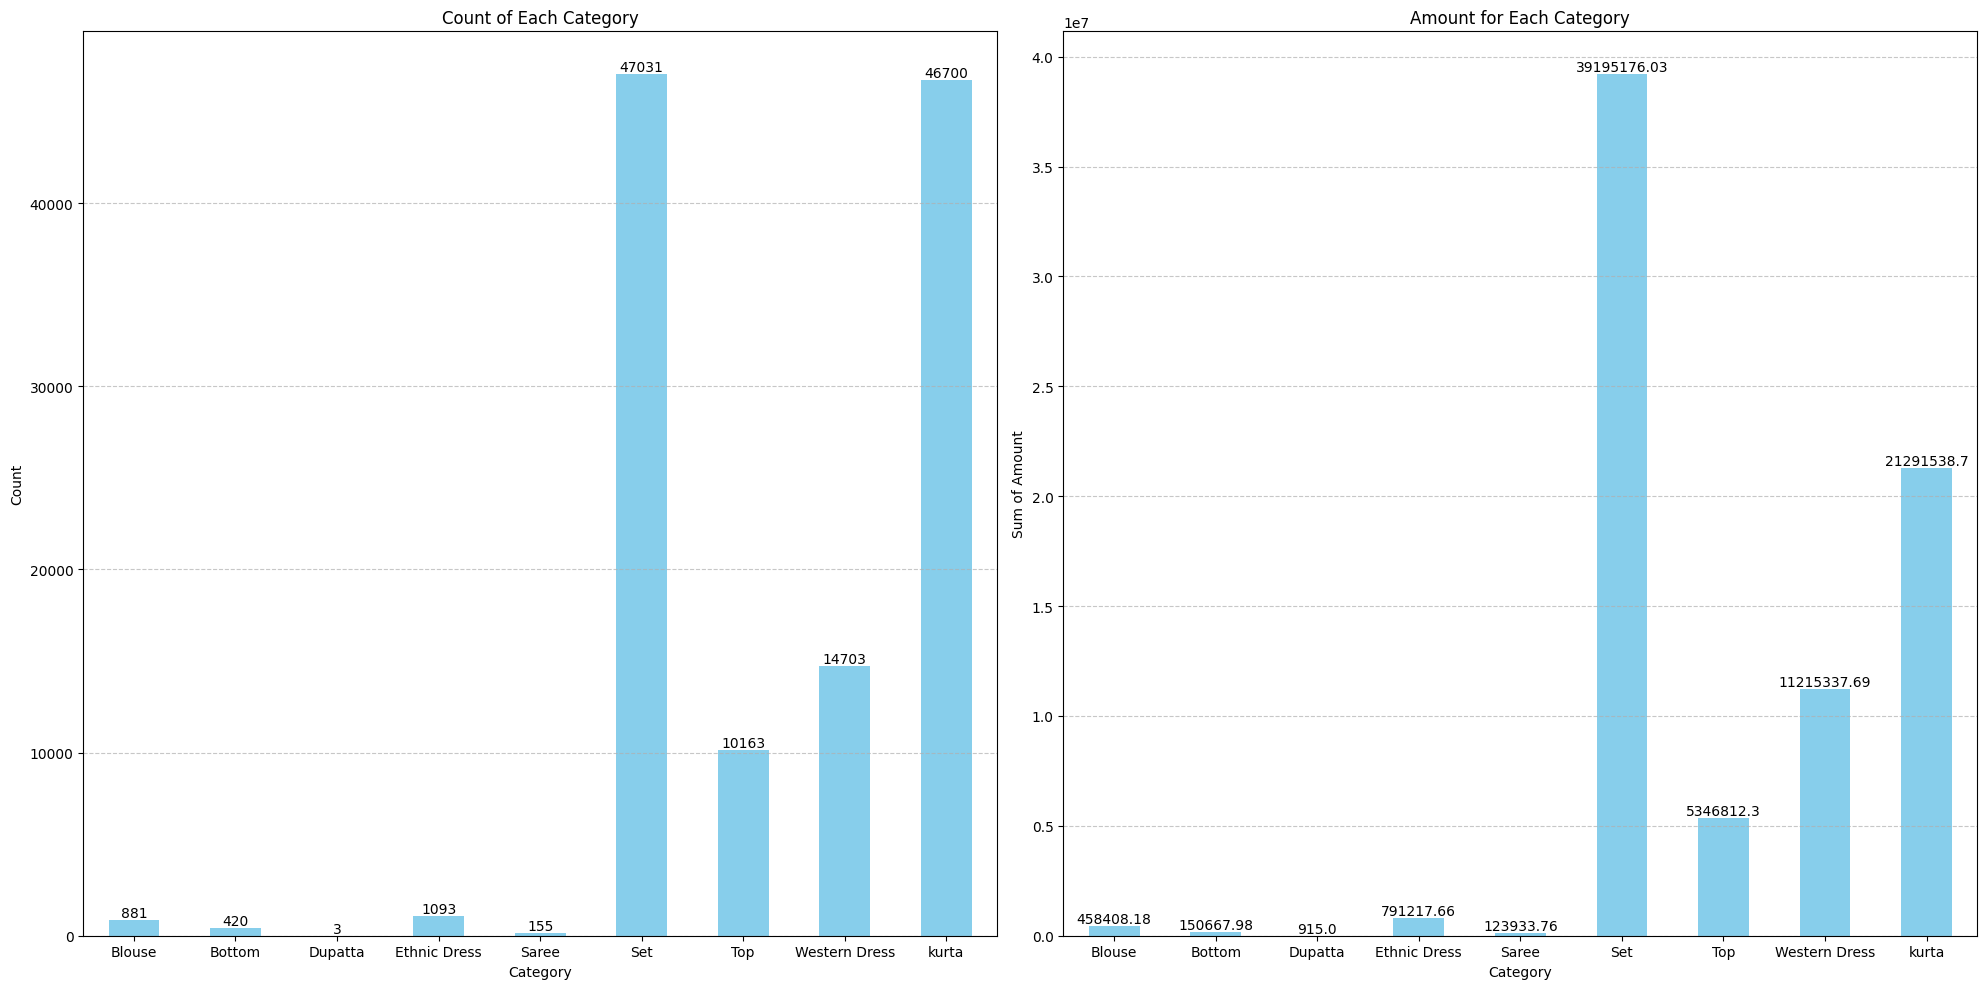

In [12]:
category_count = df.groupby('Category').size()
category_sum = df.groupby('Category')['Amount'].sum()

# Creating the figure and subplots
plt.figure(figsize=(20, 10))

# Plotting the first bar chart for count of each category
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
bars = category_count.plot(kind='bar', color='skyblue')
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')

# Plotting the second bar chart for sum of amount in each category
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
bars = category_sum.plot(kind='bar', color='skyblue')
plt.title('Amount for Each Category')
plt.xlabel('Category')
plt.ylabel('Sum of Amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


**Total Sale for each Category**
The number of sale for kurta and set is al

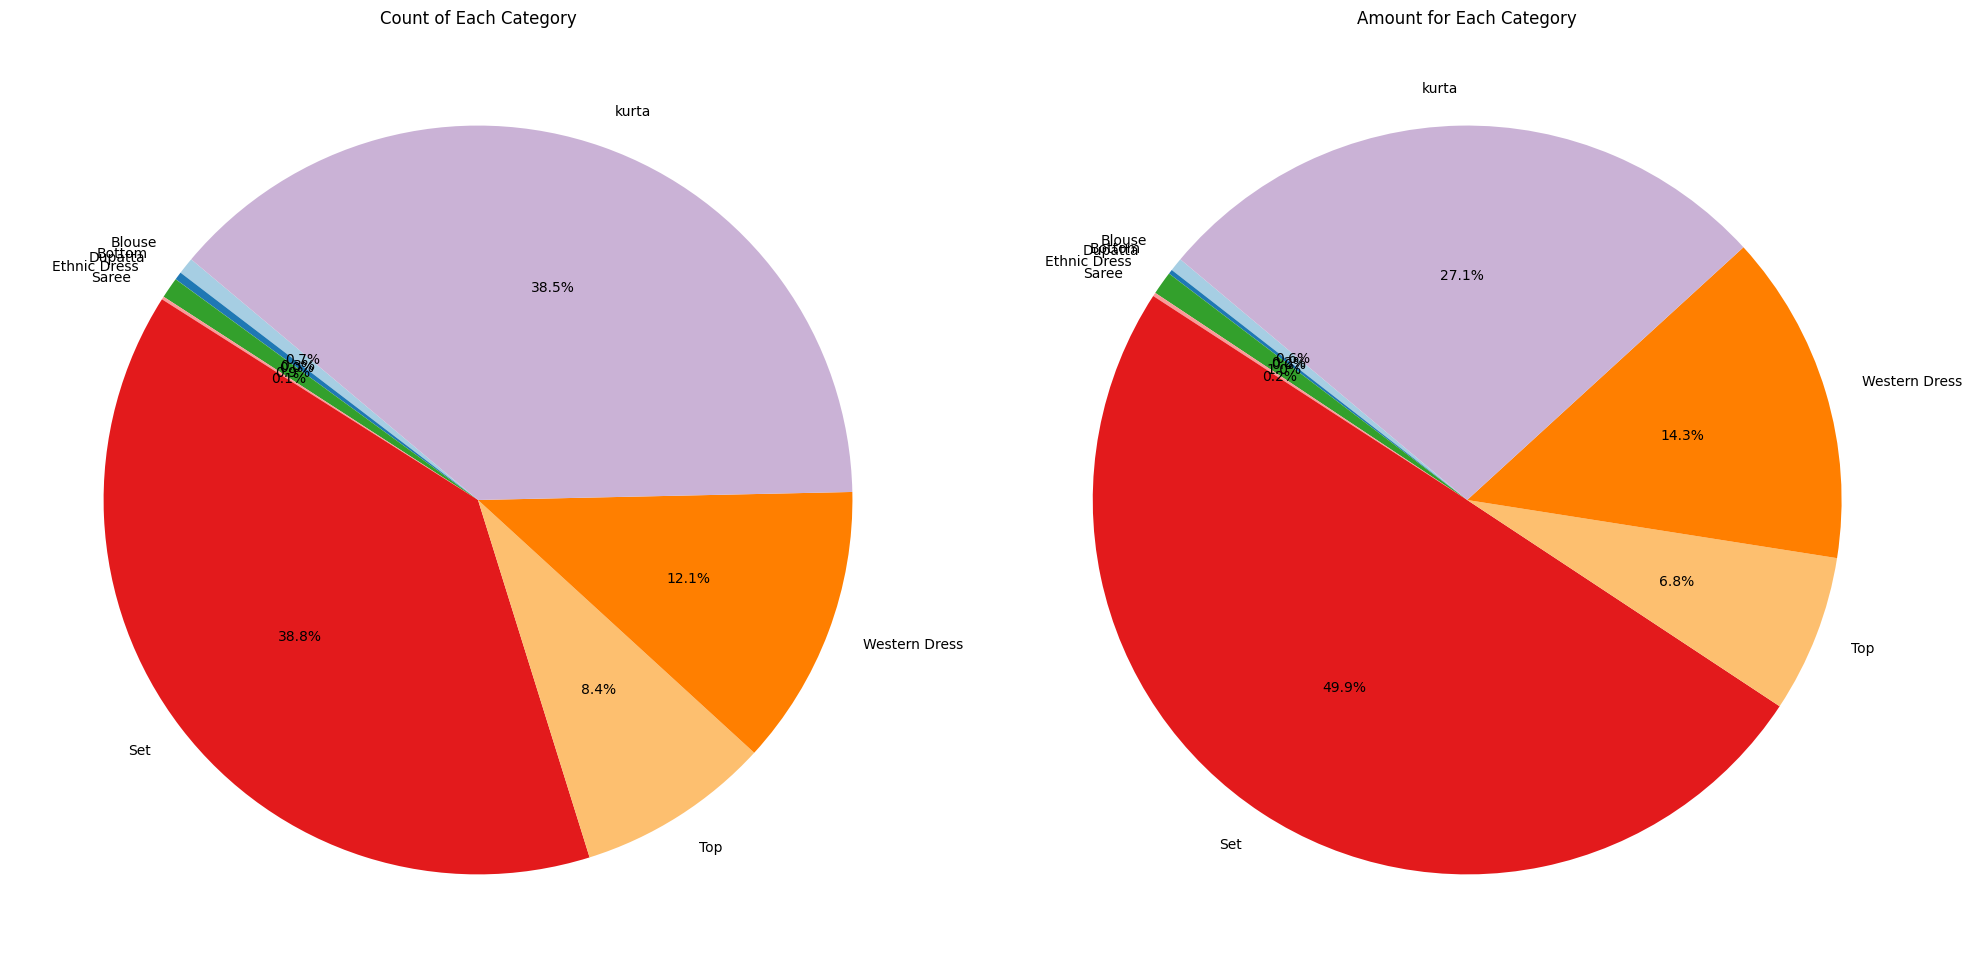

In [13]:
plt.figure(figsize=(20, 10))

# Plotting the pie chart for count of each category
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
category_count.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Count of Each Category')
plt.ylabel('')  # Remove the 'Category' label

# Plotting the pie chart for sum of amount in each category
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
category_sum.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Amount for Each Category')
plt.ylabel('')  # Remove the 'Category' label

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

/tmp/ipykernel_33/3597779917.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format


<Figure size 1200x800 with 0 Axes>

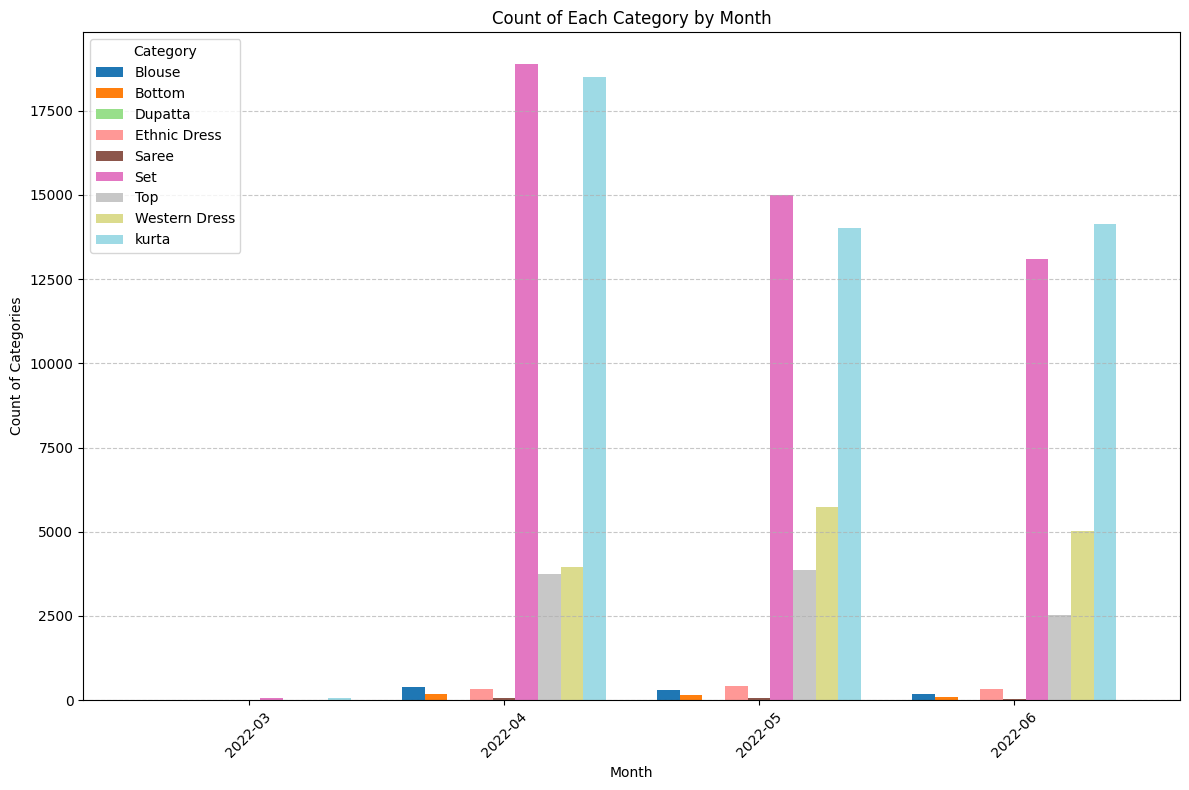

In [14]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format

# Group by month and 'Category' and count the occurrences of each category
category_count = df.groupby([df['Date'].dt.to_period('M'), 'Category']).size().unstack().fillna(0)

# Plotting side-by-side bars for counts
plt.figure(figsize=(12, 8))
category_count.plot(kind='bar', width=0.8, colormap='tab20', figsize=(12, 8))

plt.title('Count of Each Category by Month')
plt.xlabel('Month')
plt.ylabel('Count of Categories')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

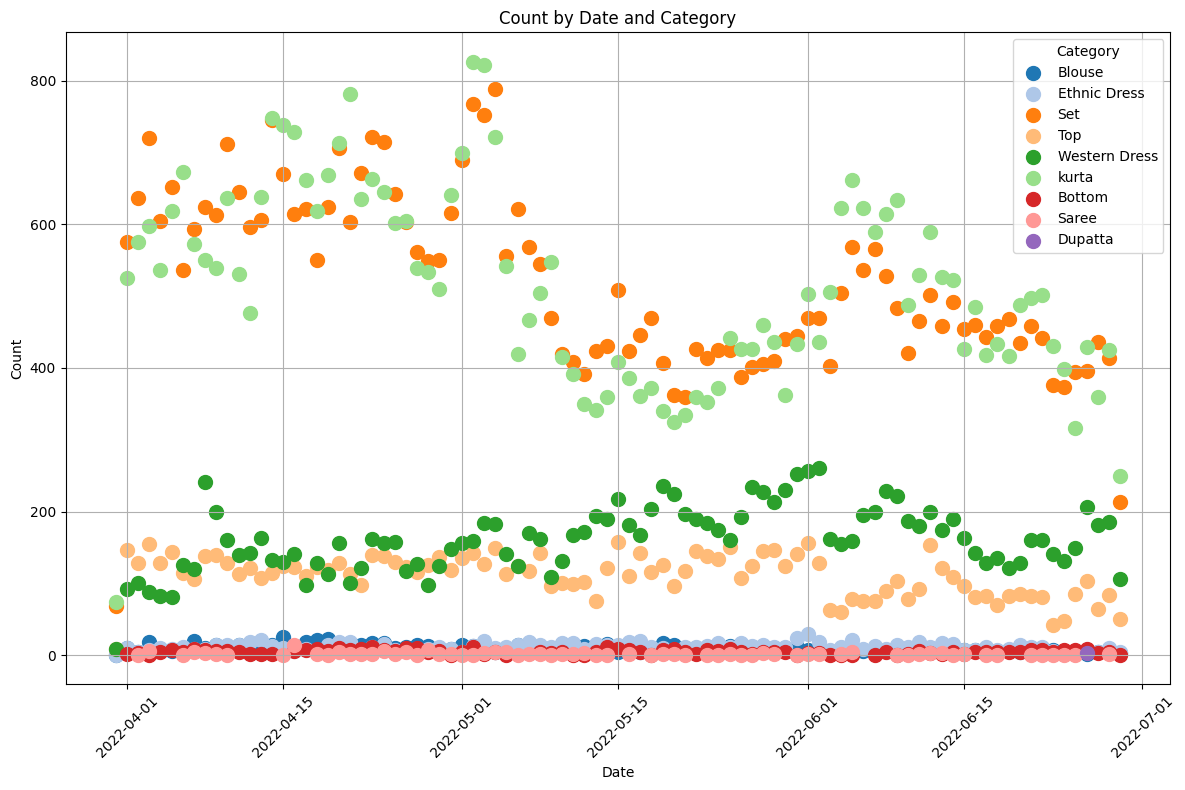

In [15]:

# Grouping by Date and Category and counting the occurrences
category_count = df.groupby(['Date', 'Category']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 8))
categories = category_count['Category'].unique()
colors = plt.cm.tab20(range(len(categories)))

for category, color in zip(categories, colors):
    subset = category_count[category_count['Category'] == category]
    plt.scatter(subset['Date'], subset['Count'], color=color, label=category, s=100)

plt.title('Count by Date and Category')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

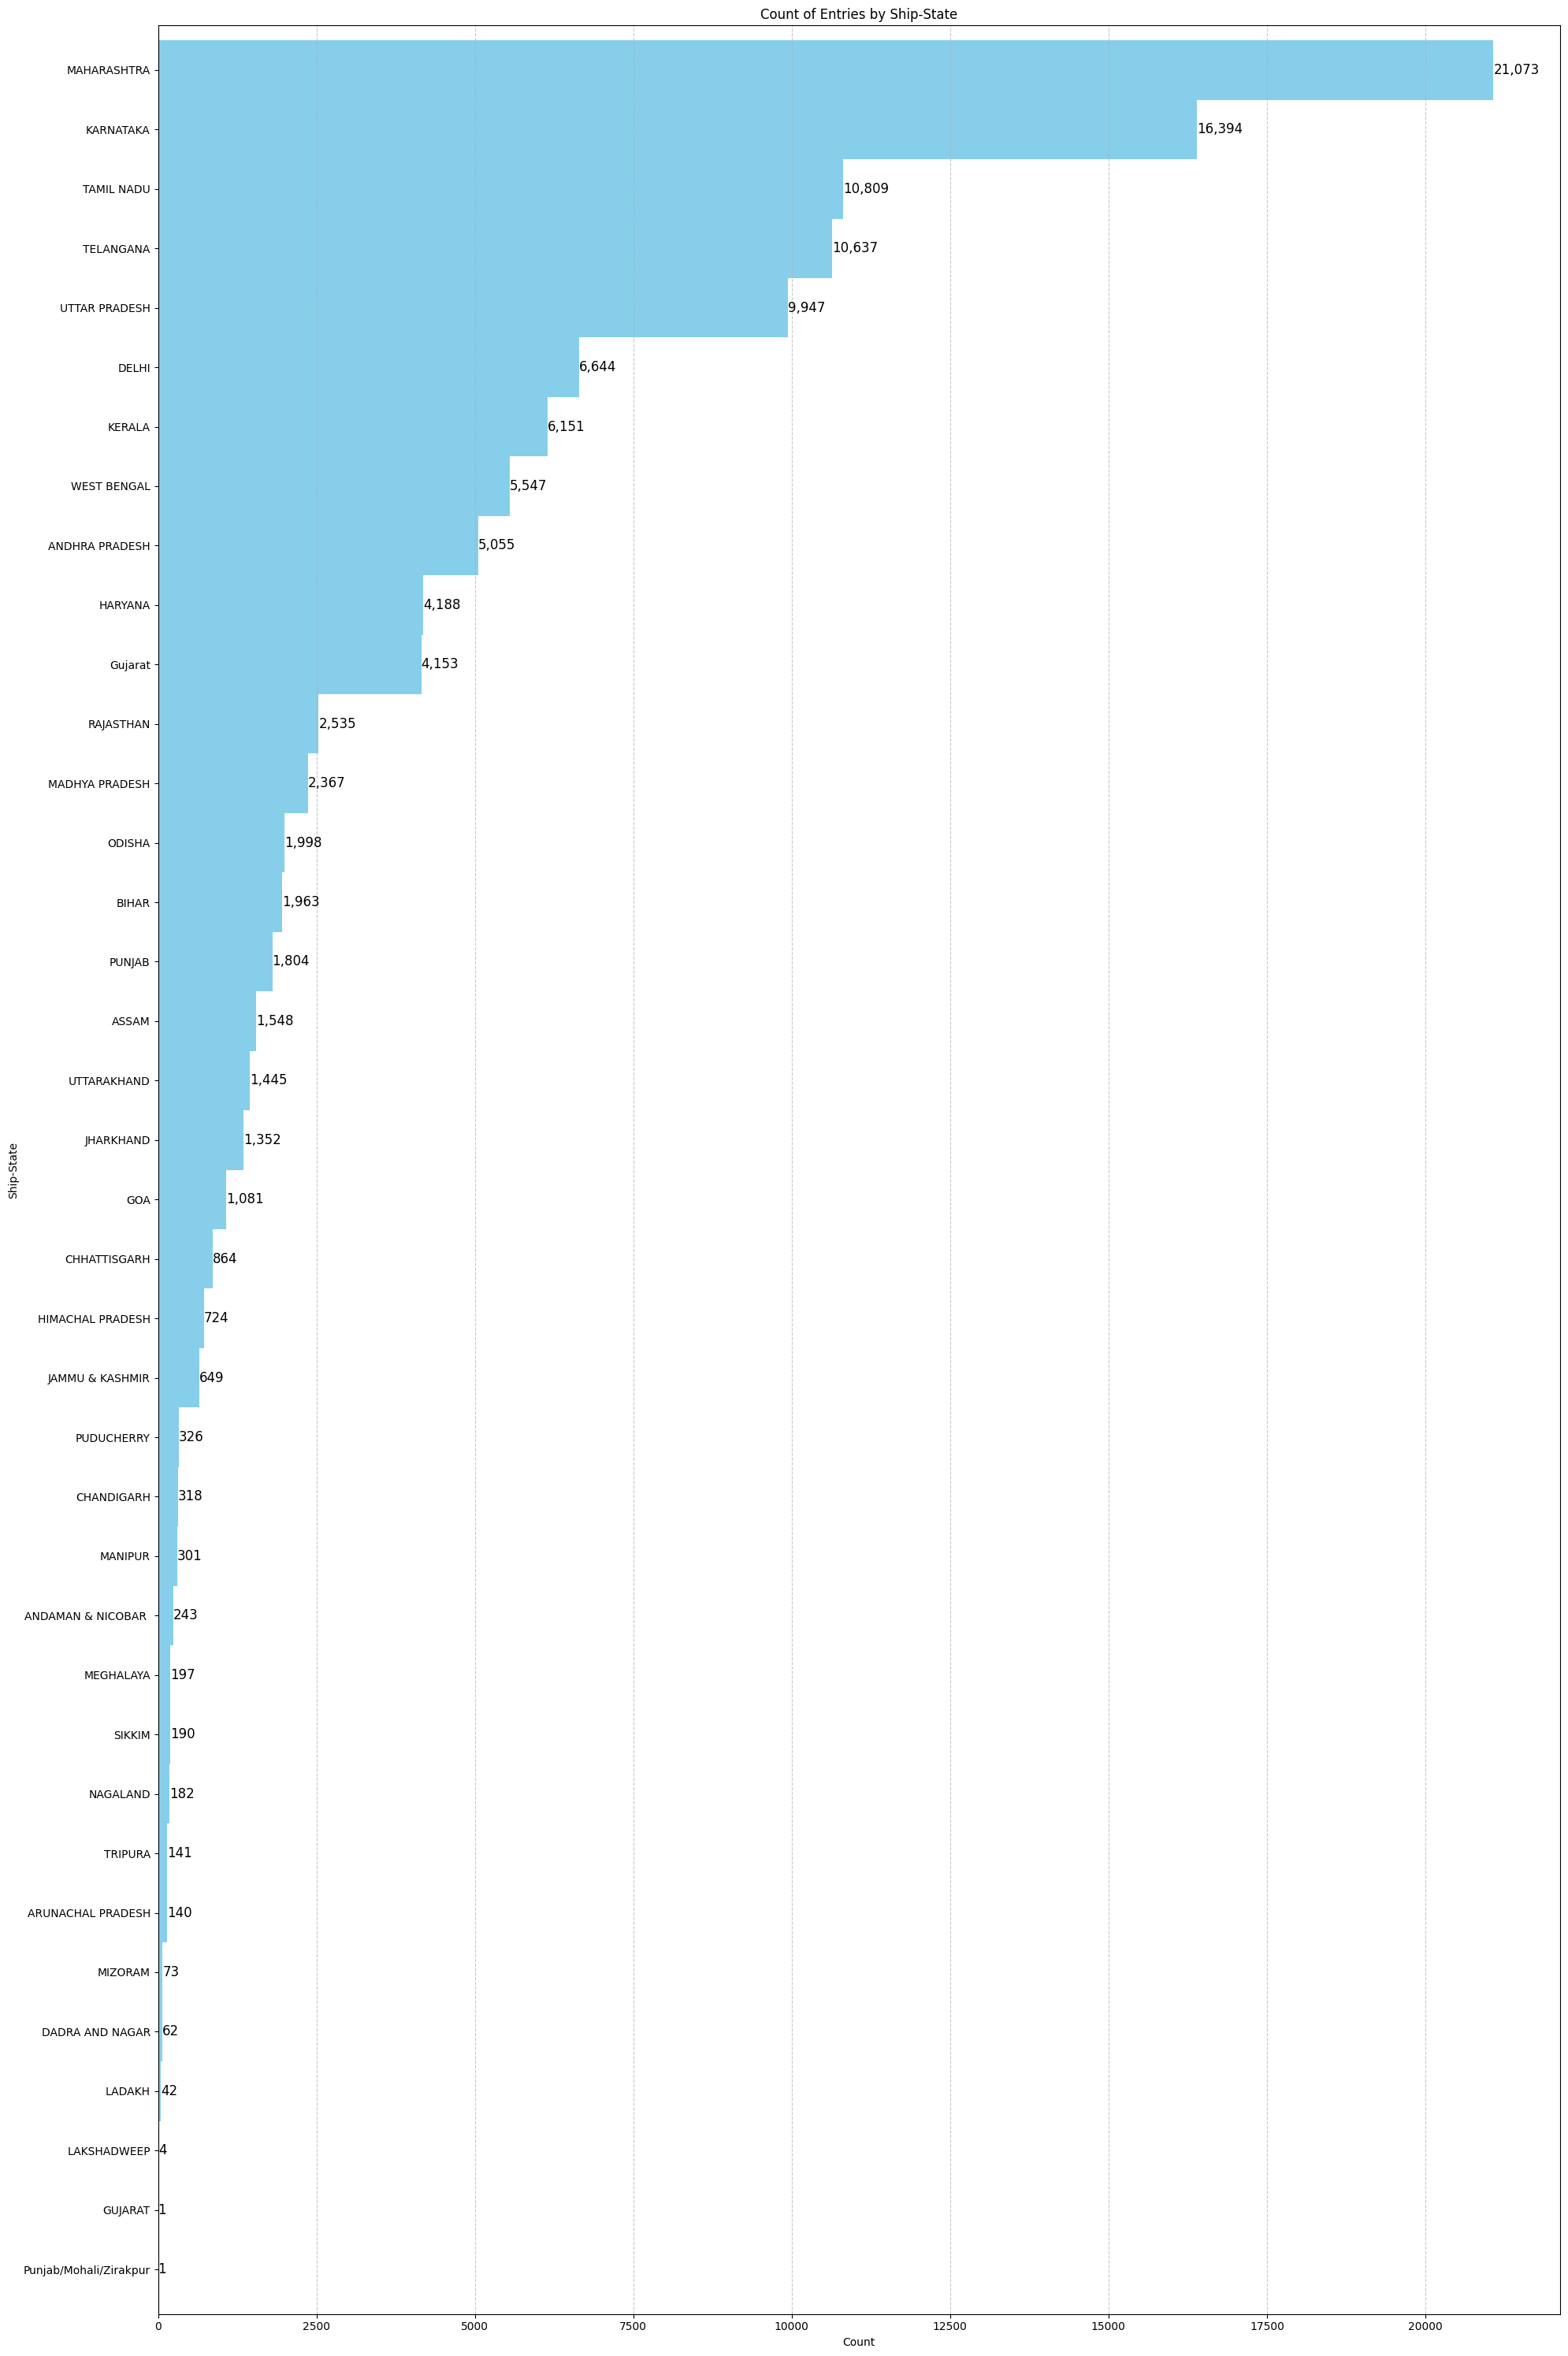

In [16]:
city_count = df.groupby('ship-state').size()

# Sort the series in descending order
city_count_sorted = city_count.sort_values(ascending=True)

# Plotting Horizontal Bar Chart
plt.figure(figsize=(20, 30))
ax = city_count_sorted.plot(kind='barh', color='skyblue', width=1)

# Add values on the bars
for index, value in enumerate(city_count_sorted):
    ax.text(value, index, f'{value:,}', va='center', ha='left', fontsize=12)

plt.title('Count of Entries by Ship-State')
plt.xlabel('Count')
plt.ylabel('Ship-State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

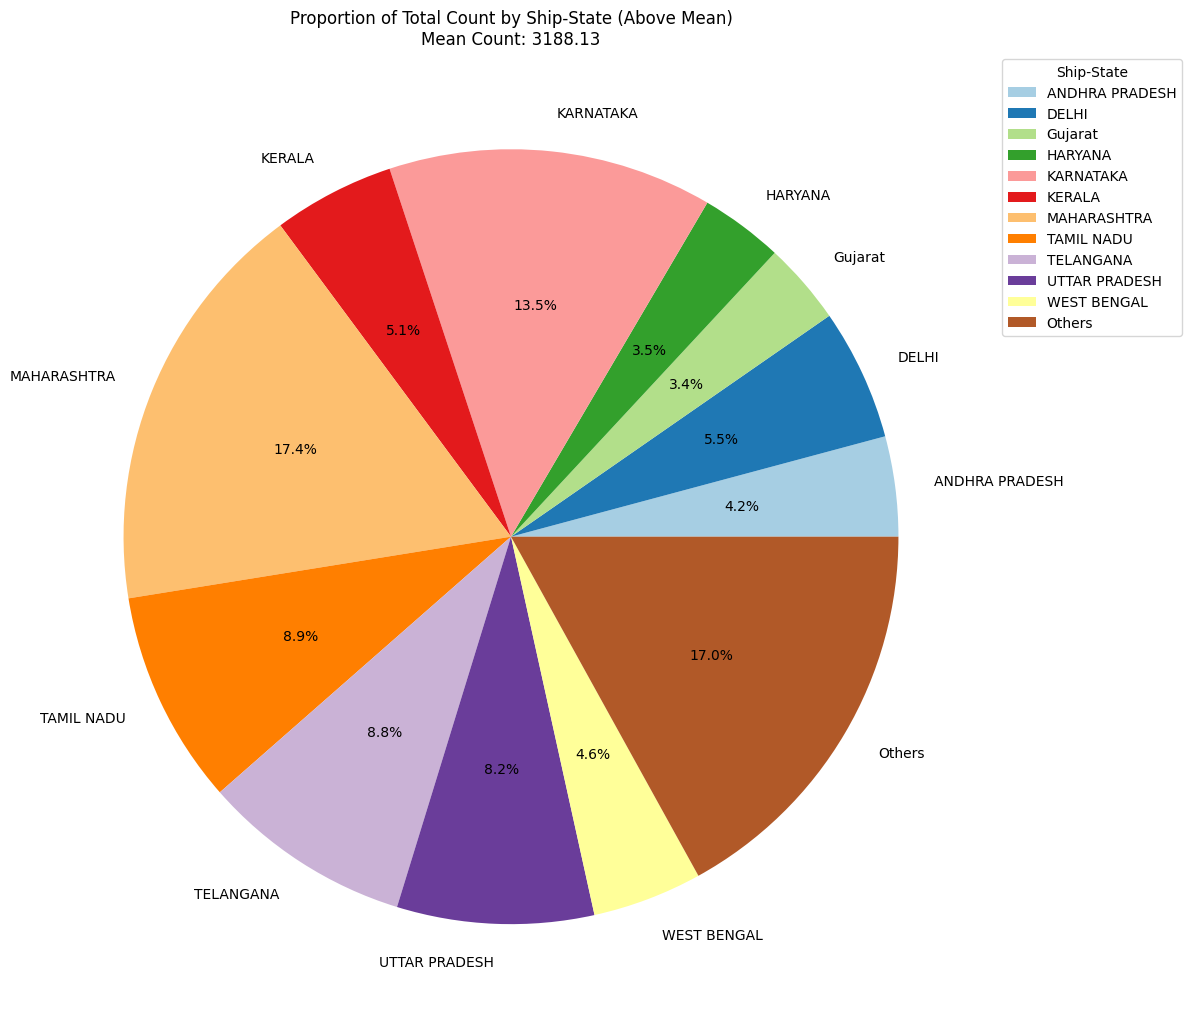

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'ship-state' and count occurrences
city_count = df.groupby('ship-state').size()

# Calculate the mean count
mean_count = city_count.mean()

# Filter to show only ship-states with counts above the mean
above_mean = city_count[city_count > mean_count]

# Aggregate counts below the mean into "Others"
below_mean = city_count[city_count <= mean_count]
below_mean_sum = below_mean.sum()

# Create a new Series for "Others"
others = pd.Series({'Others': below_mean_sum})

# Combine the above_mean and others into one Series
combined = pd.concat([above_mean, others])

# Plotting Pie Chart
plt.figure(figsize=(16, 16))
colors = plt.cm.Paired(np.linspace(0, 1, len(combined)))
ax = combined.plot(kind='pie', autopct='%1.1f%%', colors=colors, figsize=(12, 12))

# Annotate the mean value on the pie chart
plt.title(f'Proportion of Total Count by Ship-State (Above Mean)\nMean Count: {mean_count:.2f}')
plt.ylabel('')  # Hide the y-label

# Adjust legend position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Ship-State')

plt.tight_layout()
plt.show()

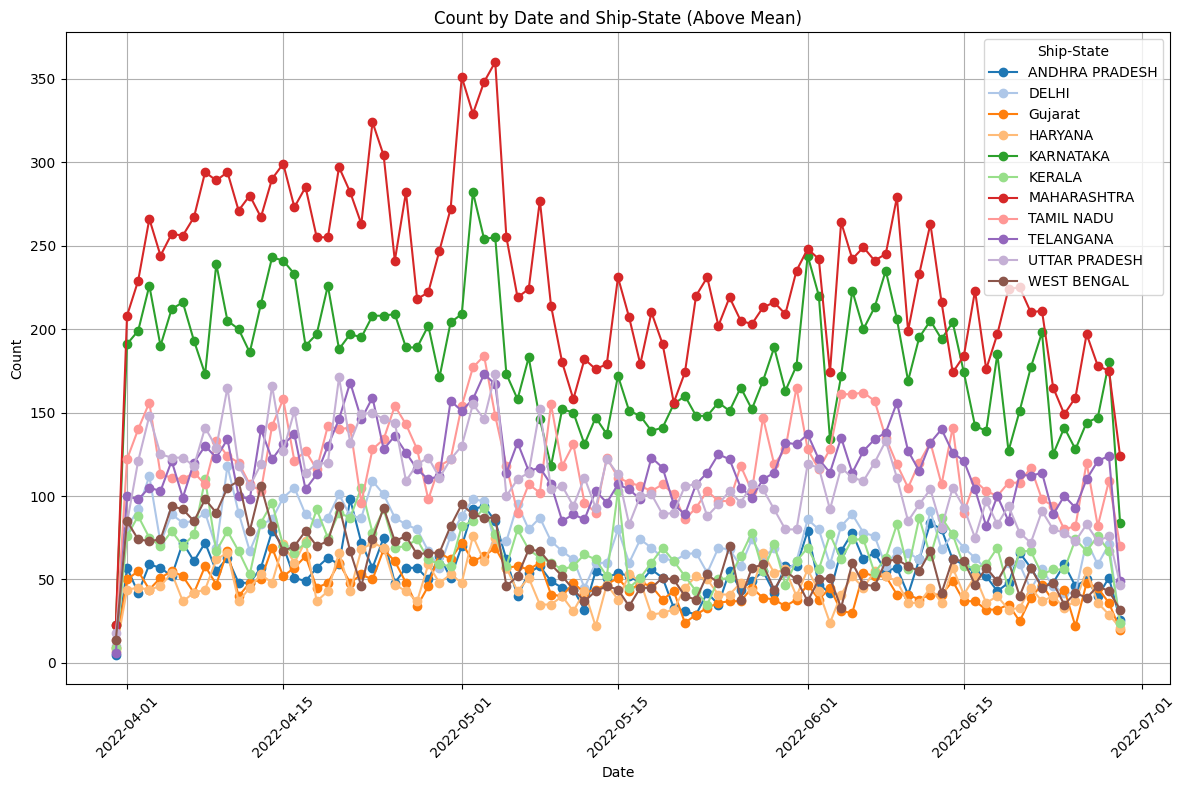

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and ship-state and count occurrences
state_count = df.groupby(['Date', 'ship-state']).size().reset_index(name='Count')

# Calculate the total count for each ship-state
total_state_count = df.groupby('ship-state').size()

# Calculate the mean count
mean_count = total_state_count.mean()

# Filter to show only ship-states with total counts above the mean
above_mean_states = total_state_count[total_state_count > mean_count].index
filtered_state_count = state_count[state_count['ship-state'].isin(above_mean_states)]

# Plotting
plt.figure(figsize=(12, 8))
states = filtered_state_count['ship-state'].unique()
colors = plt.cm.tab20(range(len(states)))

for state, color in zip(states, colors):
    subset = filtered_state_count[filtered_state_count['ship-state'] == state]
    plt.plot(subset['Date'], subset['Count'], color=color, label=state, marker='o')

plt.title('Count by Date and Ship-State (Above Mean)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Ship-State')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()